# Problem statement:
To train a neural network to classify movie reviews from the IMDB dataset as positive or negative.
To achieve this, we build a machine learning model that can read a movie review and predict whether the review is positive (the reviewer liked the movie) or negative (the reviewer didn't like the movie). We'll be using the IMDB dataset, which contains a large collection of movie reviews with corresponding sentiment labels (positive or negative).

In [117]:
# Import necessary libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import nltk
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.optimizers import Adam
from sklearn.preprocessing import LabelEncoder

### Data Loading and Exploration:

In [118]:
# Load the data
IMDB_Reviews = pd.read_csv("c:\\Users\\HP\\Documents\\STUDY\\DATA SCIENCE AND ANALYSIS - GOMYCODE\\Data Sets\\IMDB Dataset.csv")

In [119]:
IMDB_Reviews.tail(10)

,review,sentiment
49990,"Lame, lame, lame!!! A 90-minute cringe-fest th...",negative
49991,"Les Visiteurs, the first movie about the medie...",negative
49992,John Garfield plays a Marine who is blinded by...,positive
49993,Robert Colomb has two full-time jobs. He's kno...,negative
49994,This is your typical junk comedy.<br /><br />T...,negative
49995,I thought this movie did a down right good job...,positive
49996,"Bad plot, bad dialogue, bad acting, idiotic di...",negative
49997,I am a Catholic taught in parochial elementary...,negative
49998,I'm going to have to disagree with the previou...,negative
49999,No one expects the Star Trek movies to be high...,negative


In [120]:
IMDB_Reviews.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50000 entries, 0 to 49999
Data columns (total 2 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   review     50000 non-null  object
 1   sentiment  50000 non-null  object
dtypes: object(2)
memory usage: 781.4+ KB


In [121]:
IMDB_Reviews.describe()

,review,sentiment
count,50000,50000
unique,49582,2
top,Loved today's show!!! It was a variety and not...,positive
freq,5,25000


### Data Preprocessing:

In [122]:
# Convert all reviews to lower case
IMDB_Reviews['review'] = IMDB_Reviews['review'].apply(lambda x: x.lower())

In [123]:
# Remove HTML tags and URLs from reviews
IMDB_Reviews['review'] = IMDB_Reviews['review'].apply(lambda x: ' '.join(nltk.regexp_tokenize(x, r'<.*?>|http\S+')))

In [124]:
# Tokenize the text and remove stop words
nltk.download('punkt')
nltk.download('stopwords')
stop_words = set(stopwords.words('english'))
IMDB_Reviews['review'] = IMDB_Reviews['review'].apply(lambda x: [word for word in word_tokenize(x) if word not in stop_words])
IMDB_Reviews['review'] = IMDB_Reviews['review'].apply(lambda x: ' '.join(x))

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\HP\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\HP\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [125]:
# Use TF-IDF Vectorization to convert text data into a format suitable for input into the neural network

vectorizer = TfidfVectorizer()
X = vectorizer.fit_transform(IMDB_Reviews['review'])

# Convert sparse matrix to dense array
X = X.toarray()
y = IMDB_Reviews['sentiment']

In [126]:
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [127]:
# Label encoding
le = LabelEncoder()
y_train = le.fit_transform(y_train)
y_test = le.transform(y_test)

# Ensure y_train and y_test are 1D arrays
y_train = y_train.flatten()
y_test = y_test.flatten()

### Model Building:

In [128]:
# Construct a Sequential model with Dense layers
model = Sequential()
model.add(Dense(64, activation='relu', input_shape=(X_train.shape[1],)))
model.add(Dense(32, activation='relu'))
model.add(Dense(1, activation='sigmoid'))

c:\Users\HP\Documents\STUDY\DATA SCIENCE AND ANALYSIS - GOMYCODE\GMC_PYTHON\My_Virtual_Env\Lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [129]:
# Compile the model
model.compile(loss='binary_crossentropy', optimizer=Adam(learning_rate=0.001), metrics=['accuracy'])

### Model Training:

In [130]:
# Train the model using the training set
history = model.fit(X_train, y_train, epochs=10, batch_size=32, validation_data=(X_test, y_test))

Epoch 1/10
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.5095 - loss: 0.6932 - val_accuracy: 0.5213 - val_loss: 0.6924
Epoch 2/10
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 7s 4ms/step - accuracy: 0.5143 - loss: 0.6929 - val_accuracy: 0.5211 - val_loss: 0.6925
Epoch 3/10
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 5s 4ms/step - accuracy: 0.5101 - loss: 0.6926 - val_accuracy: 0.5042 - val_loss: 0.6925
Epoch 4/10
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 6s 4ms/step - accuracy: 0.5092 - loss: 0.6923 - val_accuracy: 0.5043 - val_loss: 0.6928
Epoch 5/10
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.5062 - loss: 0.6921 - val_accuracy: 0.5213 - val_loss: 0.6922
Epoch 6/10
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - accuracy: 0.5065 - loss: 0.6916 - val_accuracy: 0.5213 - val_loss: 0.6922
Epoch 7/10
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - accuracy: 0.5082 - loss: 0.6915 - val_accuracy: 0.5213 - val_loss: 0.6920
Epoch 8/10
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - accuracy: 0.5081 - loss: 0.6915 - 

### Evaluation:

In [131]:
# Evaluate the model on a separate test set
loss, accuracy = model.evaluate(X_test, y_test)
print(f'Test loss: {loss:.3f}')
print(f'Test accuracy: {accuracy:.3f}')

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.5201 - loss: 0.6923
Test loss: 0.692
Test accuracy: 0.521


### Visualization:

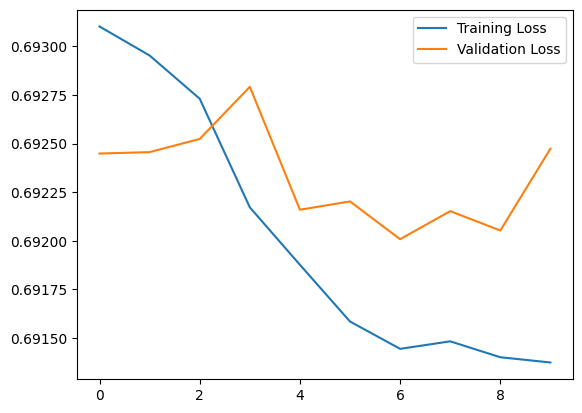

In [132]:
# Plot training and validation loss over epochs
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.legend()
plt.show()

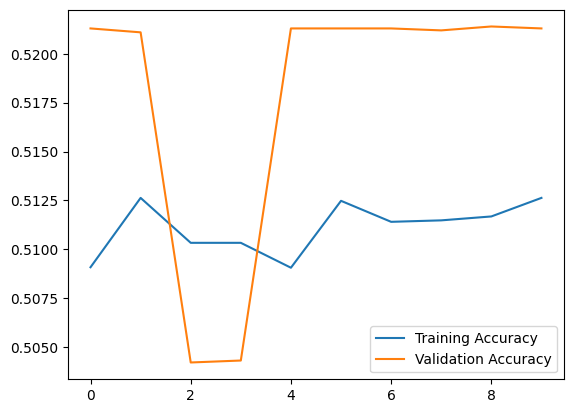

In [133]:
# Plot training and validation accuracy over epochs
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.legend()
plt.show()

# Sentiment Analysis Report:
This project aimed to develop a sentiment analysis model using a dataset of IMDB reviews. The goal was to classify reviews as either positive or negative.

## Methodology
1. Data Preprocessing: The dataset was preprocessed by converting all reviews to lowercase, removing HTML tags and URLs, tokenizing the text, and removing stop words.
2. Feature Extraction: TF-IDF vectorization was used to convert the preprocessed text data into a format suitable for input into the neural network.
3. Model Development: A binary classification model was developed using a sequential neural network with two hidden layers.
4. Model Training: The model was trained using the training set, and its performance was evaluated using the test set.
5. Model Visualisation

## Insights Gained
- **Text Data Preprocessing**: The project reinforced the importance of preprocessing text data effectively. Lowercasing text, removing HTML tags and URLs, and tokenizing while removing stopwords helped clean the data and make it more suitable for training.

- **TF-IDF Vectorization**: TF-IDF vectorization played a significant role in converting text into a numerical format that could be fed into the neural network. It helped the model focus on the important words in the reviews, capturing meaningful patterns for classification.

- **Binary Classification**: The project emphasized the binary classification task of sentiment analysis, where the model learns to predict whether a review is positive or negative. Using **sigmoid activation** and **binary cross-entropy loss** ensured that the model could handle this binary problem.

- **Model Performance**: The test accuracy of 52.1% suggests that the model is performing only slightly better than random guessing. The test loss of 0.692 is relatively high, indicating that the model is not capturing significant patterns in the data. This performance suggests that further model improvements are necessary.

## Challenges Faced and How They Were Overcome

1. **Sparse Matrix Compatibility**: 
   - **Challenge**: The **TF-IDF vectorizer** produces a sparse matrix, which is not directly compatible with Keras models. 
   - **Solution**: The sparse matrix was converted into a dense numpy array using `.toarray()`, making it compatible with the neural network.

2. **Sentiment Label Encoding**: 
   - **Challenge**: The **sentiment** column originally contained string values ('positive' and 'negative'), which needed to be encoded as numerical labels for training. 
   - **Solution**: String labels were mapped to numerical values (0 for negative, 1 for positive) using the `.map()` function, preparing the labels for model training.

3. **Underfitting**:
   - **Challenge**: The model achieved an accuracy close to random guessing (52.1%), indicating it is underfitting the data. 
   - **Solution**: This suggests that the model is too simple for the complexity of the task. Improvements in model architecture (e.g., using LSTM or GRU layers) or incorporating more sophisticated preprocessing techniques may be needed.


## Potential Improvements
1. **Advanced Model Architectures**:
   - The current model is relatively simple with two dense layers, and it may not be well-suited for capturing the sequential nature of text. Switching to **LSTM** or **GRU** layers might improve performance, as these models are designed for sequential data like text.
   
2. **Pre-trained Word Embeddings**:
   - Using **Word2Vec** or **GloVe** pre-trained word embeddings instead of TF-IDF might improve the quality of word representations and result in better classification performance. Fine-tuning pre-trained models like **BERT** could further enhance the model’s accuracy.

3. **Regularization**:
   - **Dropout layers** or **L2 regularization** can be added to reduce overfitting and help the model generalize better to unseen data. Regularization techniques are crucial for improving performance on the test set.

4. **Hyperparameter Tuning**:
   - The learning rate, batch size, and number of epochs should be fine-tuned to optimize the model’s performance. Techniques like **grid search** or **random search** can help identify the best combination of hyperparameters.

5. **Cross-validation**:
   - Using **k-fold cross-validation** would provide a better understanding of the model's performance on different subsets of the data and reduce the variance in the results.

## Conclusion

The model’s performance, with a **test accuracy of 52.1%** and a **test loss of 0.692**, indicates that it is underperforming and not learning effectively from the data. This suggests that the model is too simple for the complexity of the task, and it highlights the need for architectural improvements, better preprocessing, or more advanced techniques such as using LSTM layers or pre-trained word embeddings. By addressing these areas, we can expect to improve the model’s accuracy and make it more effective in classifying movie reviews as positive or negative.

Next steps include refining the model, experimenting with different architectures and hyperparameters, and exploring techniques like class balancing and cross-validation to boost performance.